In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,roc_auc_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train= pd.read_csv('Mtrain.csv')
df_test= pd.read_csv('Mtest.csv')

In [4]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


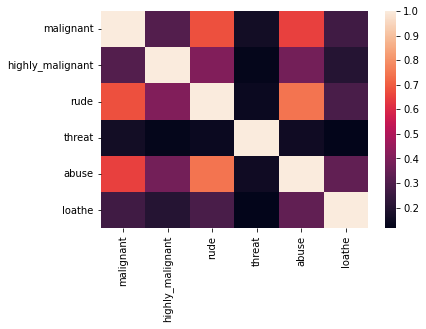

In [8]:
print(df_train.corr())
print(sns.heatmap(df_train.corr()))

malignant
0    144277
1     15294
Name: malignant, dtype: int64


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


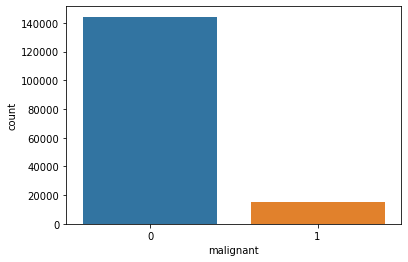

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


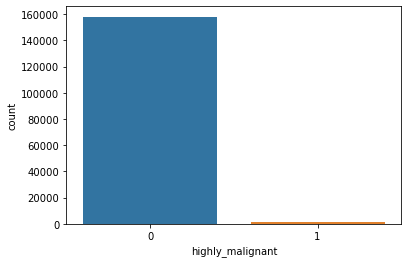

rude
0    151122
1      8449
Name: rude, dtype: int64


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


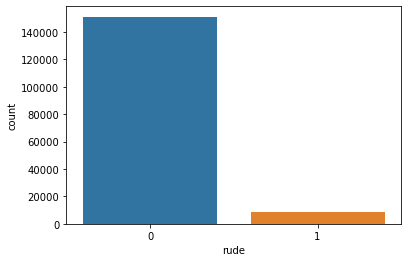

threat
0    159093
1       478
Name: threat, dtype: int64


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


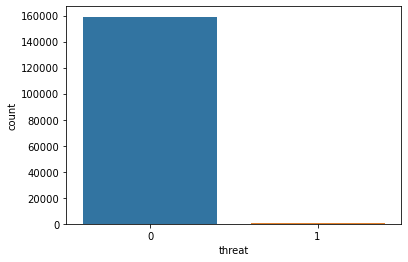

abuse
0    151694
1      7877
Name: abuse, dtype: int64


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


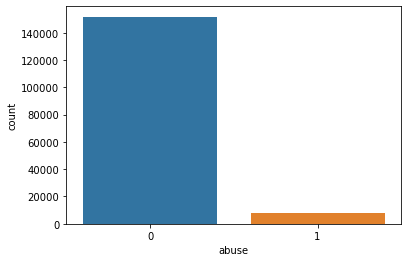

loathe
0    158166
1      1405
Name: loathe, dtype: int64


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


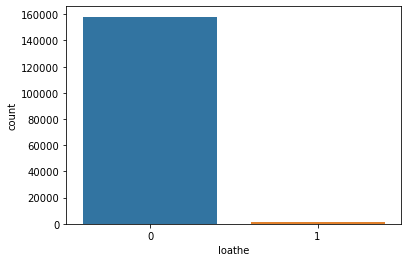

In [26]:
M=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
for i in M:
    print(i)
    print(df_train[i].value_counts())
    sns.countplot(i,data=df_train)
    plt.show()

In [9]:
#dropping Id column.
df_train.drop(columns='id',axis=1,inplace=True)

In [10]:
#dropping Id column.
df_test.drop(columns='id',axis=1,inplace=True)

# DATA PRE PROCESSING

CLEANING TRAIN DATA SET

In [11]:
# Replace email addresses with 'email'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_train['comment_text'] = df_train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
df_train['comment_text'] = df_train['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\s+|\s+?$', '')

# CLEANING TEST DATA SET

In [12]:
# Replace email addresses with 'email'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
df_test['comment_text'] = df_test['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+|\s+?$', '')

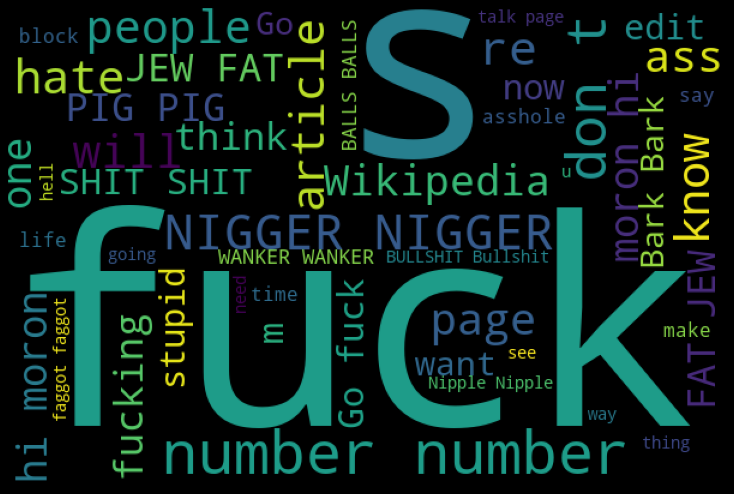

In [34]:
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

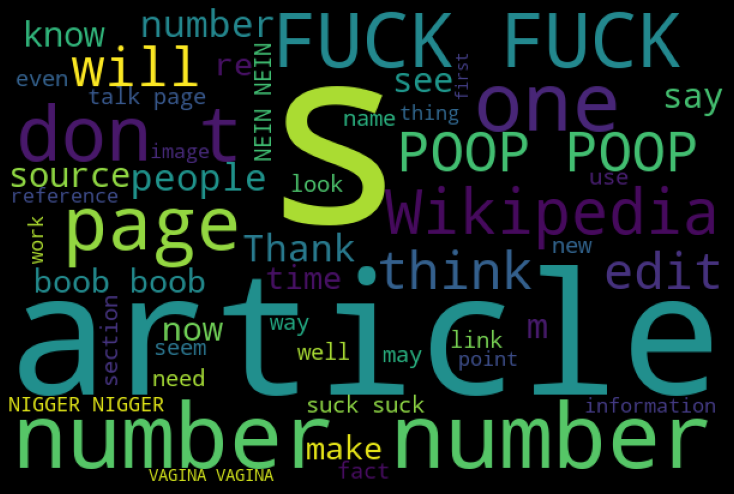

In [36]:
hams = df_test['comment_text'][df_train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

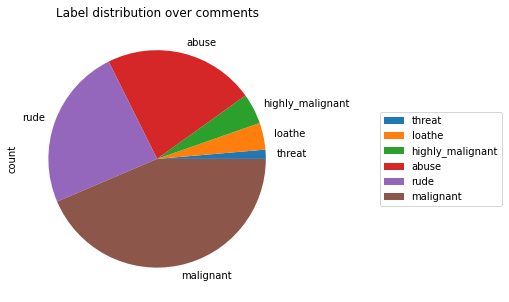

In [38]:
df_distribution = df_train[M].sum()\
                          .to_frame()\
                          .rename(columns={0:'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count',
                        title = 'Label distribution over comments',
                        figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

# STEMMING AND LEMMATIZATION

In [39]:
#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
for i in range(len( df_train['comment_text'])):
    df_train['comment_text'][i]= df_train['comment_text'][i].lower()
    Y = []
    for word in df_train['comment_text'][i].split():
        Y.append((lemmatiser.lemmatize(word,pos="v")))
        df_train['comment_text'][i]= " ".join(Y)

In [ ]:
for i in range(len(df_test['comment_text'])):
    df_test['comment_text'][i]= df_test['comment_text'][i].lower()
    Y = []
    for word in df_test['comment_text'][i].split():
        Y.append((lemmatiser.lemmatize(word,pos="v")))
        df_test['comment_text'][i]= " ".join(Y)

In [13]:
x=df_train.drop(['malignant'],axis=1)
y=df_train['malignant']

In [14]:
comment = df_train['comment_text']

In [15]:
naive = MultinomialNB()
tf_vec = TfidfVectorizer()

In [16]:
x=tf_vec.fit_transform(comment)

In [17]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42)

naive.fit(x_train,y_train)

MultinomialNB()

In [18]:
y_pred= naive.predict(x_test)

In [19]:
from sklearn.metrics import log_loss

print ('Accuracy score = > ', accuracy_score(y_test,y_pred))

print ('Log loss score = > ',log_loss(y_test,y_pred))

Accuracy score = >  0.9177549946105833
Log loss score = >  2.8406421313530186


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36078
           1       0.98      0.14      0.25      3815

    accuracy                           0.92     39893
   macro avg       0.95      0.57      0.60     39893
weighted avg       0.92      0.92      0.89     39893



In [21]:
from sklearn.svm import LinearSVC

In [22]:
clf=LinearSVC(C = 20,class_weight='balanced')
clf.fit(x_train,y_train)

LinearSVC(C=20, class_weight='balanced')

In [23]:
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     36078
           1       0.73      0.74      0.73      3815

    accuracy                           0.95     39893
   macro avg       0.85      0.85      0.85     39893
weighted avg       0.95      0.95      0.95     39893



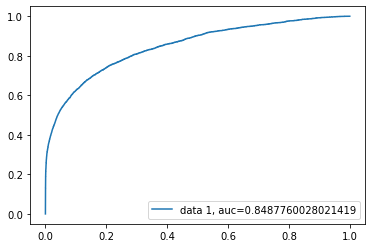

In [25]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
proba = naive.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  proba)
auc = metrics.roc_auc_score(y_test, proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [27]:
x = 'this product is really bad. i do not like it'

vec = tf_vec.transform([x])
clf.predict(vec)

array([1], dtype=int64)

In [28]:
x = 'this is really good. I like it'

vec = tf_vec.transform([x])
clf.predict(vec)

array([0], dtype=int64)

In [29]:
import pickle 

filename = 'Malignant_comments_project_by_YCM'

pickle.dump(naive, open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))